In [16]:
import jphot as jp
import matplotlib.pyplot as plt
import numpy as np
import h5py
import matplotlib as mpl
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [17]:
outputDir  = '/home/jbvielfaure/Desktop/JEREMY/DATA_simu/HI_D_SMC/00164/star_best/direction100_100k2/'
ICFile  = "%s/LyaPhotIC_100k.recLya.1"%outputDir
ResFile = "%s/LyaPhotIC_100k.recLya.result.1"%outputDir


In [18]:
path = '/home/jbvielfaure/Desktop/JEREMY/DATA_simu/Halos/00164/DatAndPlot/selection_position/'
name0 = 'galaxy1_sansHead'

In [19]:
p = jp.photonlist(ICFile,ResFile)

In [20]:
## TIMESTEP AND UNIT
timeS    = [164, 163, 162, 161]
unit_l   = [0.229476043567044e+26, 0.22875660056933e+26, 0.228032810185619e+26, 0.227305981266731e+26]
step     = 0

timestep = timeS[step]

## UNITs
unit_kpc    = unit_l[step] / 3.0857e21


if timestep == timeS[0]:
    centerX = 4.7764915227890015e-01 * unit_kpc
    centerY = 4.9454817175865173e-01 * unit_kpc
    centerZ = 5.1947605609893799e-01 * unit_kpc
elif timestep == timeS[1]:
    centerX = 4.7774544358253479e-01 * unit_kpc
    centerY = 4.9456593394279480e-01 * unit_kpc
    centerZ = 5.1942074298858643e-01 * unit_kpc
elif timestep == timeS[2]:
    centerX = 4.7784045338630676e-01 * unit_kpc
    centerY = 4.9464085698127747e-01 * unit_kpc
    centerZ = 5.1934361457824707e-01 * unit_kpc
elif timestep == timeS[3]:
    centerX = 4.7788354754447937e-01 * unit_kpc
    centerY = 4.9474737048149109e-01 * unit_kpc
    centerZ = 5.1927447319030762e-01 * unit_kpc
    
## GRB POSITION
val     = [0., 0., 7.849673e-01, 1.563233e+00, 1.220026e-01]

In [21]:
def h5_read_stars(filename):
    ''' lit le fichier stars.h5 '''
    import h5py
    f = h5py.File(filename,'r')
    star_mass = f['star_mass'][:]
    star_x = f['star_x'][:]
    star_y = f['star_y'][:]
    star_z = f['star_z'][:]
    star_id = f['star_id'][:]
    star_age = f['star_age'][:]
    star_vx = f['star_vx'][:]
    star_vy = f['star_vy'][:]
    star_vz = f['star_vz'][:]
    star_mets = f['star_mets'][:]
    star_minit = f['star_minit'][:]
    f.close()
    return star_mass,star_x,star_y,star_z,star_id,star_age,star_vx,star_vy,star_vz,star_mets,star_minit


def h5_read_cells(filename):
    ''' lit le fichier cells.h5 '''
    f = h5py.File(filename,'r')
    cells = f["cells"][:,:]
    if 'rt' not in filename:
        cell_pos = f["cell_pos"][:,:]
        cell_l = f["cell_l"][:]
        f.close()
        return cells,cell_pos,cell_l
    else:
        f.close()
        return cells

## DATA
star_mass,st_x,st_y,st_z,star_id,star_age,star_vx,star_vy,star_vz,star_mets,star_minit = h5_read_stars(path + 'stars.h5')
star_x      = st_x.copy()
star_y      = st_y.copy()
star_z      = st_z.copy()

## CONVERSION
star_x      = star_x * unit_kpc - centerX
star_y      = star_y * unit_kpc - centerY
star_z      = star_z * unit_kpc - centerZ
star_mets   = star_mets /0.02

val1 = np.column_stack((star_mass, star_minit, star_x, star_y, star_z, star_id, star_age, star_vx, star_vy, star_vz, star_mets, st_x, st_y, st_z))

val1 = val1[val1[:, 6] < 10.0]
val1 = val1[val1[:, 6] > 5.0]

<IPython.core.display.Javascript object>


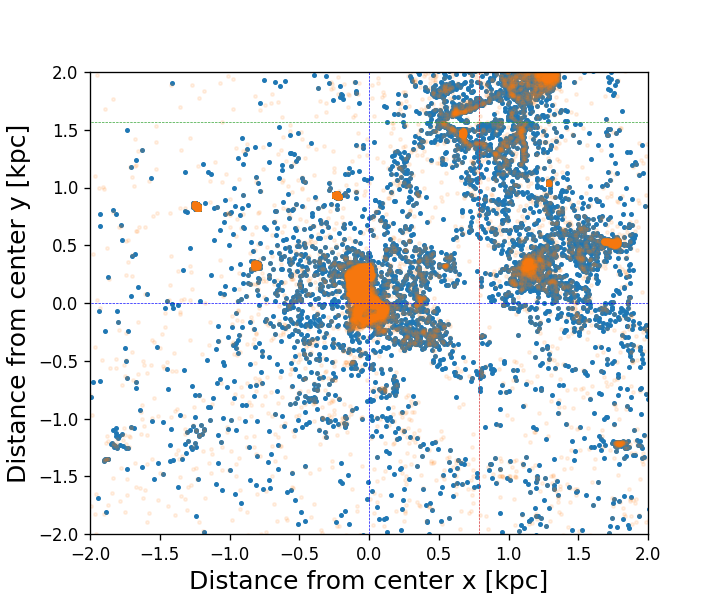

<IPython.core.display.Javascript object>


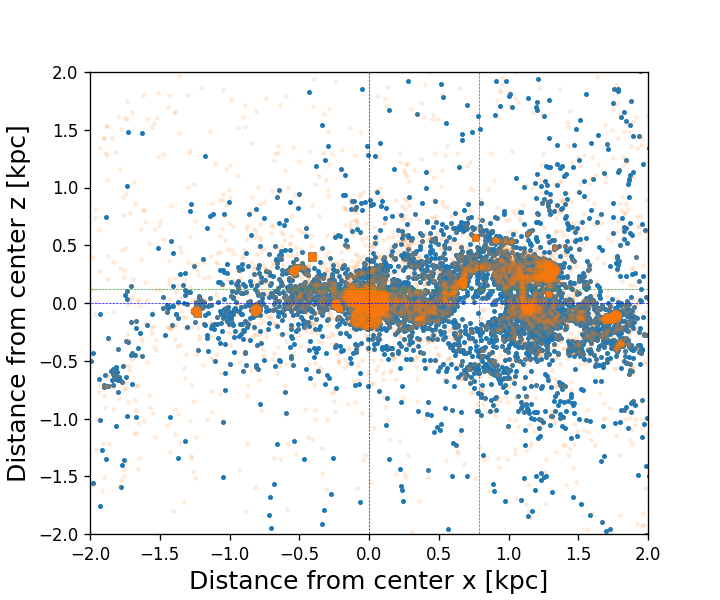

Text(0,0.5,'Distance from center z [kpc]')

In [54]:
## OPTIONS
lim   = 'y'
lastS = 'y'
stars = 'n'

## CONVERSION
## Lyman-alpha emission position (Initial) kpc
xIc = p.x_ic * unit_kpc - centerX
yIc = p.y_ic * unit_kpc - centerY
zIc = p.z_ic * unit_kpc - centerZ

## Lyman-alpha last scattering position kpc
xLs = p.x * unit_kpc - centerX
yLs = p.y * unit_kpc - centerY
zLs = p.z * unit_kpc - centerZ
    
%matplotlib notebook

if lim == 'y':
    axmin = -2.
    axmax = 2
    aymin = -2.
    aymax = 2
    
valmin = min(val1[:, 6])
valmax = max(val1[:, 6])
norm = mpl.colors.Normalize(vmin=valmin, vmax=valmax)
cmap = mpl.cm.YlOrBr

fig1 = plt.figure(figsize=(6,5))
plt.plot(xIc,yIc,'.',alpha=1, markersize=4)
if lastS =='y':
    plt.plot(xLs,yLs,'.',alpha=0.1, markersize=4)

## CENTER
plt.plot([min(xIc), max(xIc)], [0, 0], "b--", linewidth=0.4, marker="")
plt.plot([0, 0], [min(yIc), max(yIc)], "b--", linewidth=0.4, marker="")
## GRB POSITION
plt.plot([min(xIc), max(xIc)], [val[3], val[3]], "o--", linewidth=0.4, marker="")
plt.plot([val[2], val[2]], [min(yIc), max(yIc)], "o--", linewidth=0.4, marker="")


## STELLAR PARTICLES
if stars == 'y':
    h1 = plt.scatter((val1[:, 2]), val1[:, 3], c=val1[:, 6], linewidth=0.5, norm=norm, s=10,
                            edgecolors='none', alpha=0.5, cmap='YlOrRd', marker='o',
                            zorder=90,
                            # label='Initial FWHM 150 km/s'
                            )
    colb = plt.colorbar(h1)
    colb.set_label('Age [Myrs]', fontsize=18)

if lim == 'y':
    plt.xlim(axmin, axmax)
    plt.ylim(aymin, aymax)
    
plt.xlabel(r'Distance from center x [kpc]',fontsize=15)
plt.ylabel(r'Distance from center y [kpc]',fontsize=15)

################################
fig2 = plt.figure(figsize=(6,5))
plt.plot(xIc,zIc,'.',alpha=1, markersize=4)
if lastS =='y':
    plt.plot(xLs,zLs,'.',alpha=0.1, markersize=4)

## CENTER
plt.plot([min(xIc), max(xIc)], [0, 0], "b--", linewidth=0.4, marker="")
plt.plot([0, 0], [min(zIc), max(zIc)], "b--", linewidth=0.4, marker="")
## GRB POSITION
plt.plot([min(xIc), max(xIc)], [val[4], val[4]], "o--", linewidth=0.4, marker="")
plt.plot([val[2], val[2]], [min(zIc), max(zIc)], "o--", linewidth=0.4, marker="")


## STELLAR PARTICLES
if stars == 'y':
    h1 = plt.scatter((val1[:, 2]), val1[:, 4], c=val1[:, 6], linewidth=0.5, norm=norm, s=10,
                            edgecolors='none', alpha=0.5, cmap='YlOrRd', marker='o',
                            zorder=90,
                            # label='Initial FWHM 150 km/s'
                            )
    colb = plt.colorbar(h1)
    colb.set_label('Age [Myrs]', fontsize=18)

if lim == 'y':
    plt.xlim(axmin, axmax)
    plt.ylim(aymin, aymax)
    
plt.xlabel(r'Distance from center x [kpc]',fontsize=15)
plt.ylabel(r'Distance from center z [kpc]',fontsize=15)


In [36]:
escaping = np.where(p.status == 1)[0]
trapped = np.where(p.status == 2)[0]
pesc = p.extract_sample(escaping)
trap = p.extract_sample(trapped)

<IPython.core.display.Javascript object>


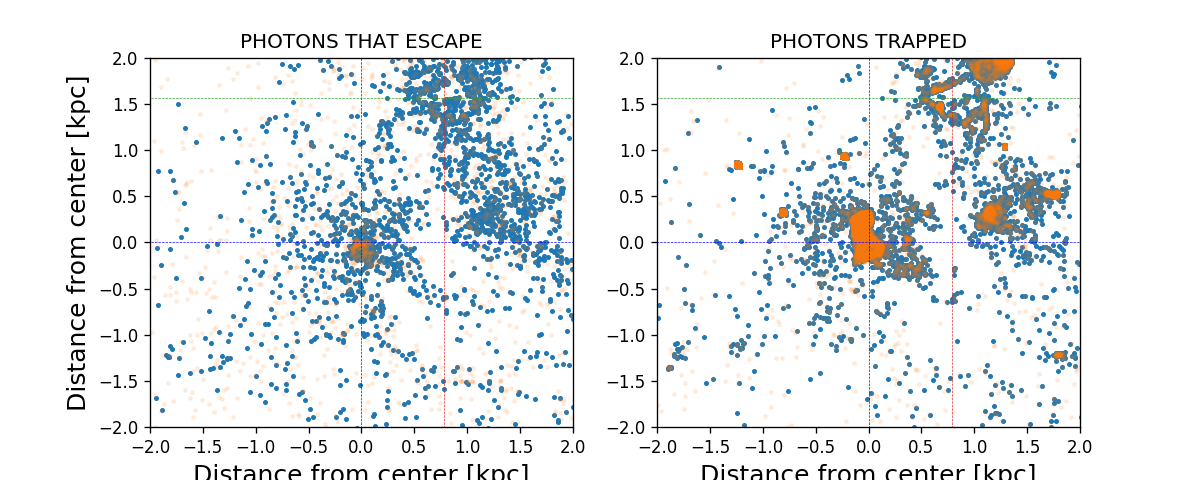

Text(0.5,0,'Distance from center [kpc]')

In [56]:
## OPTIONS
lim   = 'y'
lastS = 'y'
stars = 'n'

## CONVERSION POSITION PHOTONS THAT ESCAPE
## Lyman-alpha emission position (Initial) kpc
xIc_esc = pesc.x_ic * unit_kpc - centerX
yIc_esc = pesc.y_ic * unit_kpc - centerY
## Lyman-alpha last scattering position kpc
xLs_esc = pesc.x * unit_kpc - centerX
yLs_esc = pesc.y * unit_kpc - centerY

## CONVERSION POSITION PHOTONS THAT ARE TRAPPED
## Lyman-alpha emission position (Initial) kpc
xIc_trap = trap.x_ic * unit_kpc - centerX
yIc_trap = trap.y_ic * unit_kpc - centerY
## Lyman-alpha last scattering position kpc
xLs_trap = trap.x * unit_kpc - centerX
yLs_trap = trap.y * unit_kpc - centerY

%matplotlib notebook
#########################

if lim == 'y':
    axmin = -2.
    axmax = 2
    aymin = -2.
    aymax = 2

valmin = min(val1[:, 6])
valmax = max(val1[:, 6])
norm = mpl.colors.Normalize(vmin=valmin, vmax=valmax)
cmap = mpl.cm.YlOrBr


fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.set_title('PHOTONS THAT ESCAPE')
plt.plot(xIc_esc,yIc_esc,'.',alpha=1, markersize=4)
if lastS =='y':
    plt.plot(xLs_esc,yLs_esc,'.',alpha=0.1, markersize=4)

## CENTER
plt.plot([min(xIc), max(xIc)], [0, 0], "b--", linewidth=0.4, marker="")
plt.plot([0, 0], [min(yIc), max(yIc)], "b--", linewidth=0.4, marker="")
## GRB POSITION
plt.plot([min(xIc), max(xIc)], [val[3], val[3]], "o--", linewidth=0.4, marker="")
plt.plot([val[2], val[2]], [min(yIc), max(yIc)], "o--", linewidth=0.4, marker="")

## STELLAR PARTICLES
if stars == 'y':
    h1 = plt.scatter((val1[:, 2]), val1[:, 3], c=val1[:, 6], linewidth=0.5, norm=norm, s=10,
                            edgecolors='none', alpha=0.5, cmap='YlOrRd', marker='o',
                            zorder=90,
                            # label='Initial FWHM 150 km/s'
                            )
    colb = plt.colorbar(h1)
    colb.set_label('Age [Myrs]', fontsize=14)

if lim == 'y':
    plt.xlim(axmin, axmax)
    plt.ylim(aymin, aymax)

plt.xlabel(r'Distance from center [kpc]',fontsize=15)
plt.ylabel(r'Distance from center [kpc]',fontsize=15)

#########################
ax = fig.add_subplot(122)
ax.set_title('PHOTONS TRAPPED')
plt.plot(xIc_trap,yIc_trap,'.',alpha=1, markersize=4)
if lastS =='y':
    plt.plot(xLs_trap,yLs_trap,'.',alpha=0.1, markersize=4)

## CENTER
plt.plot([min(xIc), max(xIc)], [0, 0], "b--", linewidth=0.4, marker="")
plt.plot([0, 0], [min(yIc), max(yIc)], "b--", linewidth=0.4, marker="")
## GRB POSITION
plt.plot([min(xIc), max(xIc)], [val[3], val[3]], "o--", linewidth=0.4, marker="")
plt.plot([val[2], val[2]], [min(yIc), max(yIc)], "o--", linewidth=0.4, marker="")

## STELLAR PARTICLES
if stars == 'y':
    h1 = plt.scatter((val1[:, 2]), val1[:, 3], c=val1[:, 6], linewidth=0.5, norm=norm, s=10,
                            edgecolors='none', alpha=0.5, cmap='YlOrRd', marker='o',
                            zorder=90,
                            # label='Initial FWHM 150 km/s'
                            )
    colb = plt.colorbar(h1)
    colb.set_label('Age [Myrs]', fontsize=14)

if lim == 'y':
    plt.xlim(axmin, axmax)
    plt.ylim(aymin, aymax)

plt.xlabel(r'Distance from center [kpc]',fontsize=15)
# plt.ylabel(r'Distance from center [kpc]',fontsize=15)

<IPython.core.display.Javascript object>


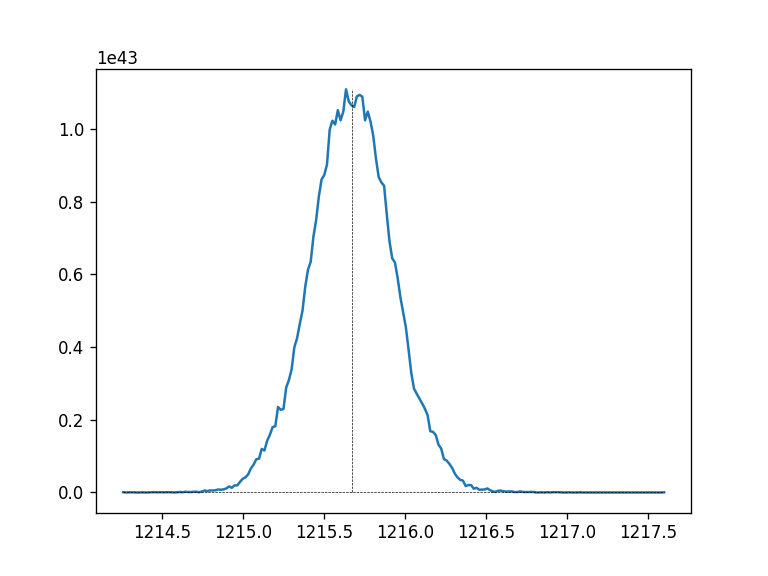

In [40]:
## Spectrum of emitted photons (in rest frame)
x,s = p.spectrum(frame='ic') 

xmin = min(x)
xmax = max(x)
smin = min(s)
smax = max(s)

%matplotlib notebook
plt.plot(x,s)

plt.plot([1215.67, 1215.67], [smin, smax], 'k--', linewidth=0.4)
plt.plot([xmin, xmax], [0., 0.], 'k--', linewidth=0.4)

<IPython.core.display.Javascript object>


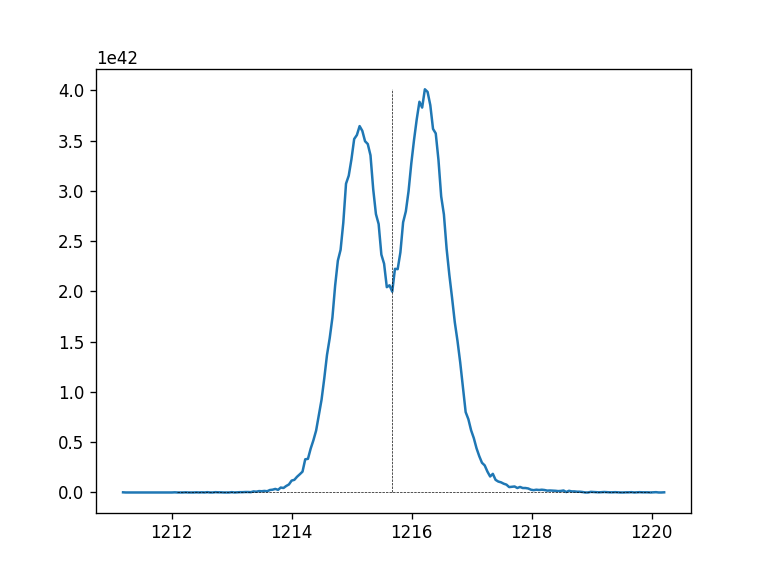

In [51]:
## Spectrum of emitted photons (in observed frame)
x,s = p.spectrum(frame='obs')

# x = (1+redshift)*x
# redshift = 3.0
# # 1./0.250002220774516-1.
# lambda0  = (1+redshift)*1215.67

# v = ((x - lambda0)/lambda0)
# vmin = min(v)
# vmax = max(v)
# smin = min(s)
# smax = max(s)
# xmin = min(x)
# xmax = max(x)
# smin = min(s)
# smax = max(s)

%matplotlib notebook
plt.plot(x,s)
plt.plot([1215.67, 1215.67], [smin, smax], 'k--', linewidth=0.4)
plt.plot([xmin, xmax], [0., 0.], 'k--', linewidth=0.4)
# plt.plot([0, 0], [smin, smax], 'k--', linewidth=0.4)
# plt.plot([vmin, vmax], [0., 0.], 'k--', linewidth=0.4)

<IPython.core.display.Javascript object>


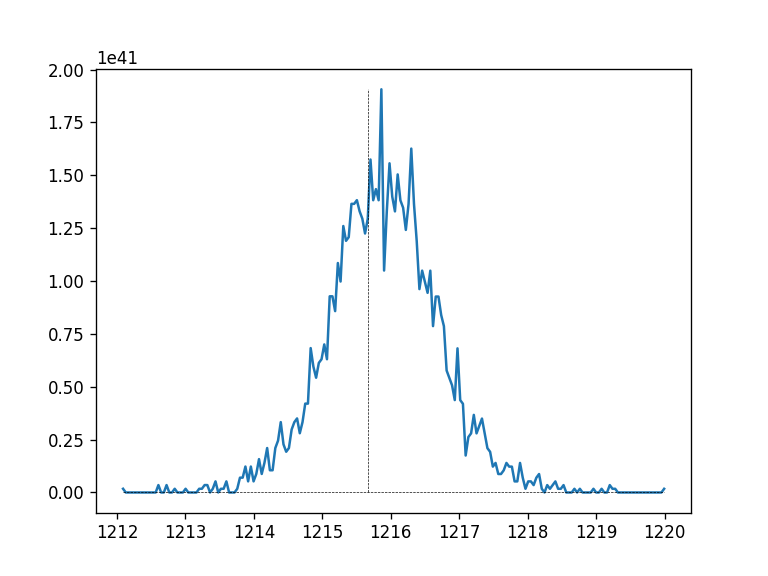

In [47]:
## Spectrum of escaping photons (in observed frame)
x,s = pesc.spectrum(frame='obs')

xmin = min(x)
xmax = max(x)
smin = min(s)
smax = max(s)

%matplotlib notebook
plt.plot(x,s)
plt.plot([1215.67, 1215.67], [smin, smax], 'k--', linewidth=0.4)
plt.plot([xmin, xmax], [0., 0.], 'k--', linewidth=0.4)

<IPython.core.display.Javascript object>


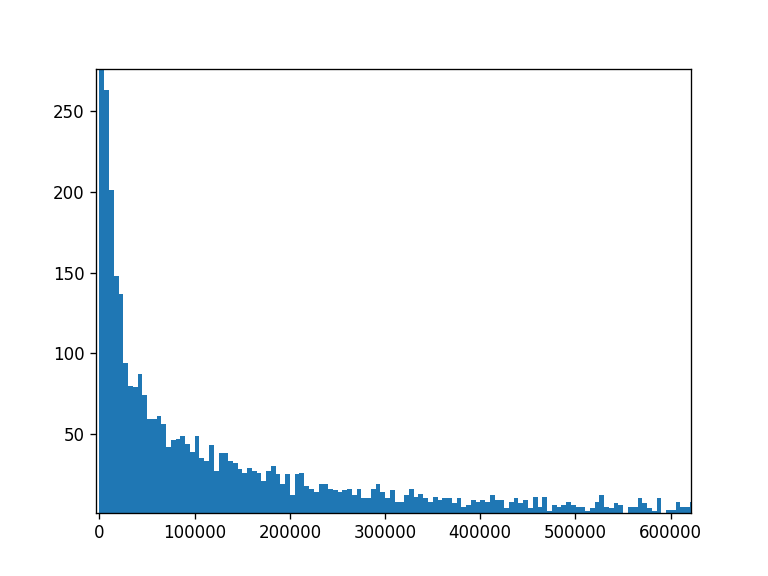

In [33]:
%matplotlib notebook
# blah = plt.hist(np.log10(pesc.nscat),bins=100)
blah = plt.hist(pesc.nscat,bins=1000)